In [877]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [878]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectKBest
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,auc,roc_curve,mean_squared_error,mean_absolute_error

In [879]:
data = pd.read_csv('zomato.csv')

In [880]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [881]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [882]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [883]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [884]:
dataframe = pd.DataFrame({'Dtypes':data.dtypes,'Null_values':data.isnull().sum(),'Duplicated':data.duplicated().sum(),'Nuique':data.nunique()})

In [885]:
dataframe

,Dtypes,Null_values,Duplicated,Nuique
url,object,0,0,51717
address,object,0,0,11495
name,object,0,0,8792
online_order,object,0,0,2
book_table,object,0,0,2
rate,object,7775,0,64
votes,int64,0,0,2328
phone,object,1208,0,14926
location,object,21,0,93
rest_type,object,227,0,93


In [886]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [887]:
round(data.describe(),1)

,votes
count,51717.0
mean,283.7
std,803.8
min,0.0
25%,7.0
50%,41.0
75%,198.0
max,16832.0


In [888]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [889]:
data.rename(columns={'book_table':'Table_book','approx_cost(for two people)':'Cost'},inplace=True)

In [890]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'Table_book', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'Cost',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### We should have to remove the unncessary columns of the data.

In [891]:
data1 = data[['online_order','Table_book','rate','votes','location','rest_type','dish_liked','cuisines','Cost','reviews_list','menu_item','listed_in(type)','listed_in(city)']]

In [892]:
data1.head()

,online_order,Table_book,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [893]:
data1.isnull().sum()

online_order           0
Table_book             0
rate                7775
votes                  0
location              21
rest_type            227
dish_liked         28078
cuisines              45
Cost                 346
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [894]:
print('Null values in the Rate')
print()
print('% of the null values in Rate',data['rate'].isnull().sum()/len(data.index)*100,'%')
print('% of the null values in Location',data['location'].isnull().sum()/len(data.index)*100,'%')
print('% of the null values in Rate',data['rate'].isnull().sum()/len(data.index)*100,'%')
print('% of the null values in Location',data['location'].isnull().sum()/len(data.index)*100,'%')
print('% of the null values in dish_liked',data['dish_liked'].isnull().sum()/len(data.index)*100,'%')
print('% of the null values in cuisines',data['cuisines'].isnull().sum()/len(data.index)*100,'%')
print('% of the null values in Cost',data['Cost'].isnull().sum()/len(data.index)*100,'%')

Null values in the Rate

% of the null values in Rate 15.033741322969234 %
% of the null values in Location 0.04060560357329312 %
% of the null values in Rate 15.033741322969234 %
% of the null values in Location 0.04060560357329312 %
% of the null values in dish_liked 54.29162557766305 %
% of the null values in cuisines 0.08701200765705668 %
% of the null values in Cost 0.669025658874258 %


In [895]:
data1 = data.copy()

In [896]:
data1['rate'].head()

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [897]:
data1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [898]:
data1['rate'].dtype

dtype('O')

In [899]:
data1['rate']=data1['rate'].str.replace('/5','')

In [900]:
data1['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [901]:
data2=data1.loc[data1['rate']!='NEW']

In [902]:
data2['rate'].isnull().sum()

7775

In [903]:
data3 = data2.loc[data['rate']!='-']

In [904]:
data3['rate'] = pd.to_numeric(data3['rate'])

In [905]:
data3['rate'].mean()

3.700448817952717

In [906]:
data3['rate'].median()

3.7

In [907]:
data3['rate'].fillna(data3['rate'].median(),inplace=True)

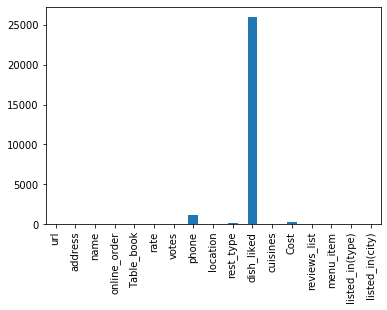

In [908]:
data3.isnull().sum().plot(kind='bar')
plt.show()

In [909]:
data3.drop(columns=['dish_liked','url','address','name'],inplace=True)

In [910]:
data3.columns

Index(['online_order', 'Table_book', 'rate', 'votes', 'phone', 'location',
       'rest_type', 'cuisines', 'Cost', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [911]:
data3.isnull().sum()

online_order          0
Table_book            0
rate                  0
votes                 0
phone              1190
location             21
rest_type           225
cuisines             45
Cost                341
reviews_list          0
menu_item             0
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [912]:
data3.drop(columns=['phone','location','rest_type'],inplace=True)

In [913]:
data3.drop(columns=['cuisines'],inplace=True)

In [914]:
data3['Cost'].dtype

dtype('O')

In [915]:
data3['Cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [916]:
data3['Cost']=data3['Cost'].str.replace(',','')

In [917]:
data3['Cost'] = pd.to_numeric(data3['Cost'])

In [918]:
data3['Cost'].isnull().sum()

341

In [919]:
data3['Cost'].mean()

561.224566691786

In [920]:
data3['Cost'].median()

400.0

In [921]:
data3['Cost'].fillna(400,inplace=True)

In [922]:
data3['votes'].isnull().sum()

0

In [923]:
data3['votes'].dtype

dtype('int64')

In [924]:
data3.drop(columns=['reviews_list'],inplace=True)

In [925]:
data3.drop(columns=['menu_item'],inplace=True)

In [926]:
data3['location']=data['location']
data3['cuisines']=data['cuisines']

In [927]:
from sklearn.preprocessing import LabelEncoder

In [928]:
label = LabelEncoder()

In [929]:
data3['online_order']=label.fit_transform(data3['online_order'])
data3['Table_book']=label.fit_transform(data3['Table_book'])
data3['listed_in(city)']=label.fit_transform(data3['listed_in(city)'])
data3['listed_in(type)']=label.fit_transform(data3['listed_in(type)'])

In [930]:
data3['location'].isnull().sum()

21

In [931]:
data3['location'].fillna('BTM',inplace=True)

In [932]:
data3['location'].isnull().sum()

0

In [933]:
data3['location']=label.fit_transform(data3['location'])

In [934]:
data3.head()

,online_order,Table_book,rate,votes,Cost,listed_in(type),listed_in(city),location,cuisines
0,1,1,4.1,775,800.0,0,1,1,"North Indian, Mughlai, Chinese"
1,1,0,4.1,787,800.0,0,1,1,"Chinese, North Indian, Thai"
2,1,0,3.8,918,800.0,0,1,1,"Cafe, Mexican, Italian"
3,0,0,3.7,88,300.0,0,1,1,"South Indian, North Indian"
4,0,0,3.8,166,600.0,0,1,4,"North Indian, Rajasthani"


In [935]:
data3.cuisines.isnull().sum()

45

In [936]:
data3.cuisines.fillna('North Indian',inplace=True)

In [937]:
data3.isnull().sum()

online_order       0
Table_book         0
rate               0
votes              0
Cost               0
listed_in(type)    0
listed_in(city)    0
location           0
cuisines           0
dtype: int64

### EDA

In [938]:
data.head()

,url,address,name,online_order,Table_book,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [939]:
data3.head()

,online_order,Table_book,rate,votes,Cost,listed_in(type),listed_in(city),location,cuisines
0,1,1,4.1,775,800.0,0,1,1,"North Indian, Mughlai, Chinese"
1,1,0,4.1,787,800.0,0,1,1,"Chinese, North Indian, Thai"
2,1,0,3.8,918,800.0,0,1,1,"Cafe, Mexican, Italian"
3,0,0,3.7,88,300.0,0,1,1,"South Indian, North Indian"
4,0,0,3.8,166,600.0,0,1,4,"North Indian, Rajasthani"


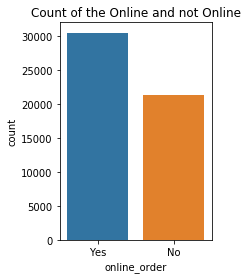

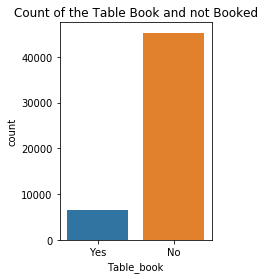

In [940]:
plt.subplot(121)
sns.countplot(x=data['online_order']).set_title('Count of the Online and not Online')
plt.show()
plt.subplot(122)
sns.countplot(x=data['Table_book']).set_title('Count of the Table Book and not Booked')
plt.show()

In [941]:
cross=pd.crosstab(data3['rate'],columns=data3['Table_book'])

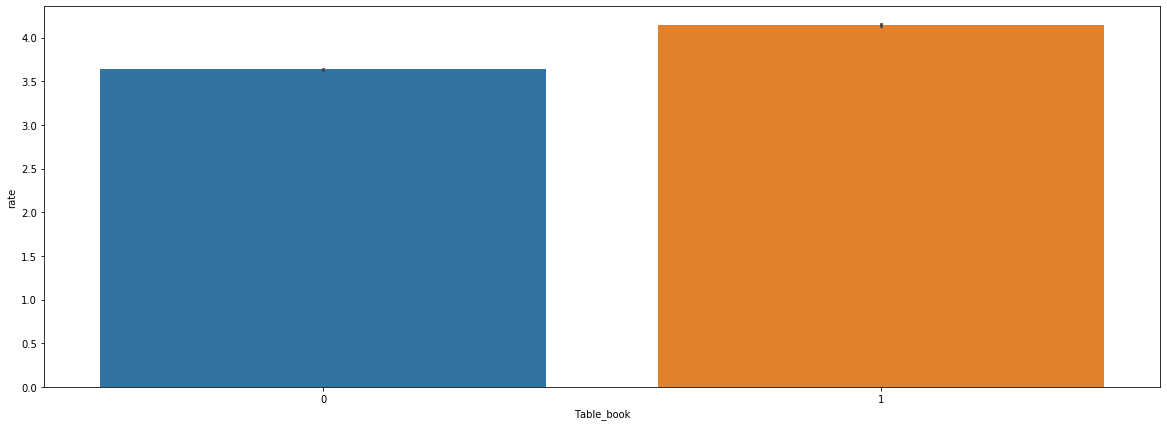

In [942]:
plt.figure(figsize=(20,7))
sns.barplot(y=data3['rate'].sort_values(),x=data3['Table_book'])
plt.show()

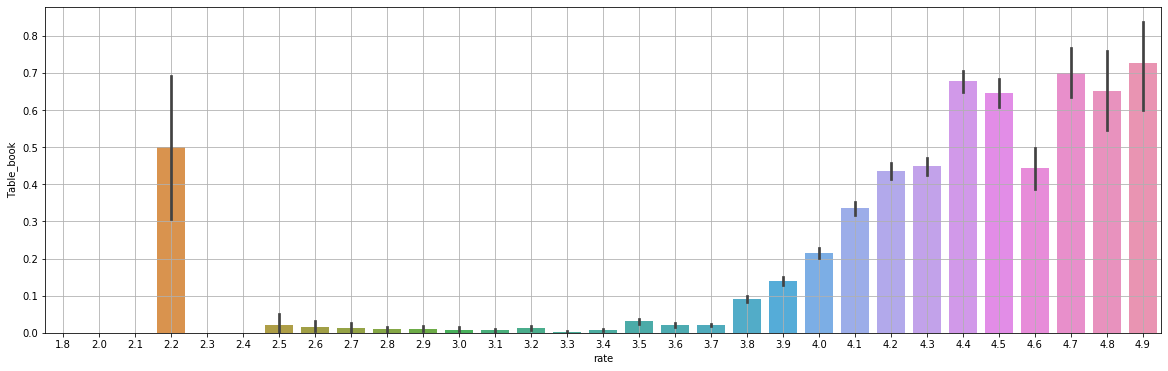

In [943]:
plt.figure(figsize=(20,6))
sns.barplot(data3.loc[data3['rate']>0.3]['rate'],data3['Table_book'])
plt.grid()
plt.show()

Since,We can see the Rating which is highly given those who Booked the tabel but the majority of the people who did not Booked the Tabel.

In [944]:
z=data3.loc[data3['Table_book']!=0]['rate']
n = data3.loc[data3['Table_book']==0]['rate']

In [945]:
len(data.loc[data['Table_book']=='No']['rate']),len(data3.loc[data3['Table_book']==0]['rate'])

(45268, 43120)

In [946]:
len(data.loc[data['Table_book']=='Yes']['rate']),len(data3.loc[data3['Table_book']!=0]['rate'])

(6449, 6320)

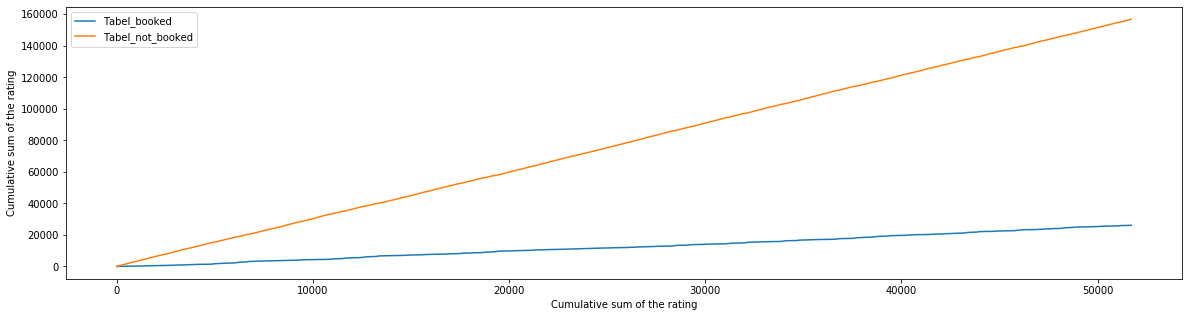

In [947]:
plt.figure(figsize=(20,5))
plt.plot(z.cumsum(),label='Tabel_booked')
plt.plot(n.cumsum(),label='Tabel_not_booked')
plt.xlabel('Cumulative sum of the rating')
plt.ylabel('Cumulative sum of the rating')
plt.legend()
plt.show()

But the majority of the people given rating those who had not table booked as comapare the people who had booked the tabel.

In [948]:
dataz = data3.query('rate > 3')

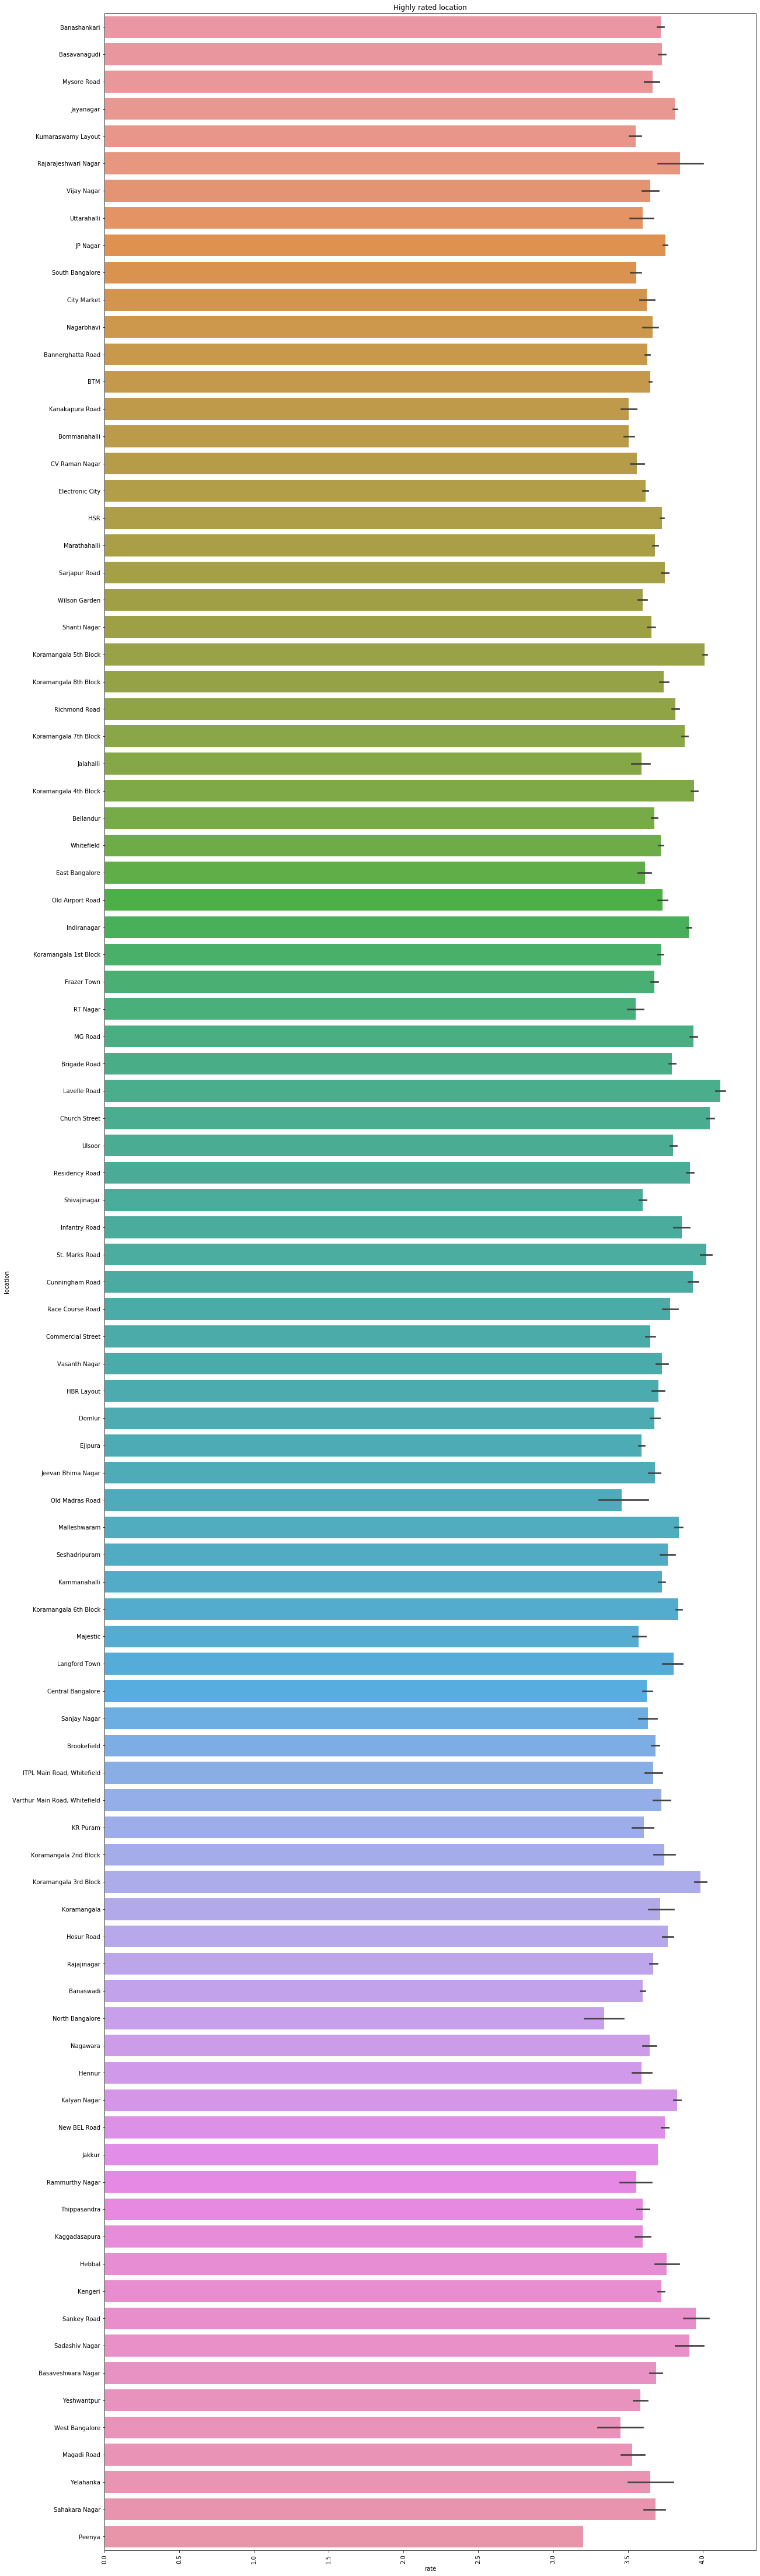

In [949]:
plt.figure(figsize=(20,80))
sns.barplot(y=data['location'],x=dataz['rate'].sort_values(ascending=False))
plt.title('Highly rated location')
plt.xticks(rotation=90)
plt.show()

**Rating Distribution.**

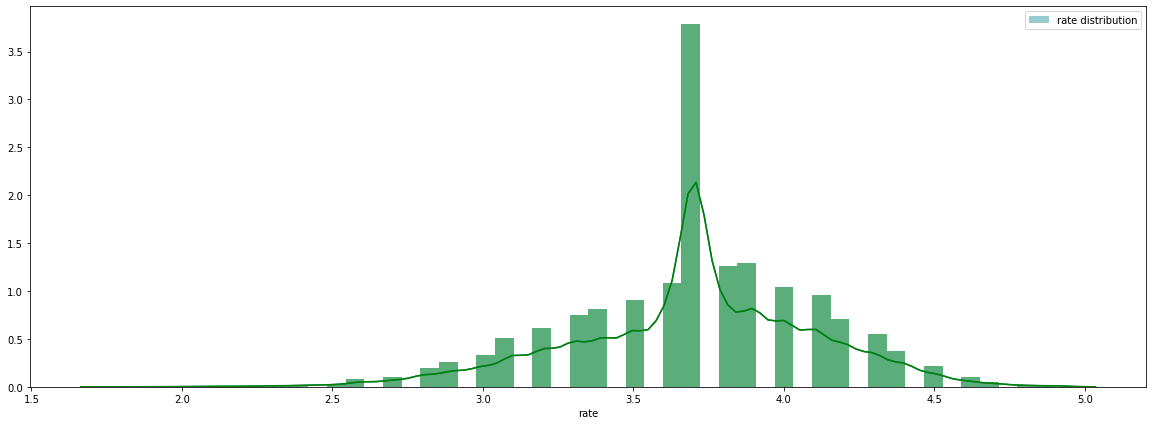

In [950]:
plt.figure(figsize=(20,7))
f =sns.distplot(data3['rate'],color='teal')
sns.distplot(data3['rate'],color='green',ax=f)
plt.legend(labels=['rate distribution'])
plt.show()

If we see the rating is highly concentrated in the range from 3.25 to 4.25.

In [951]:
dataz['rest_type'] = data['rest_type']

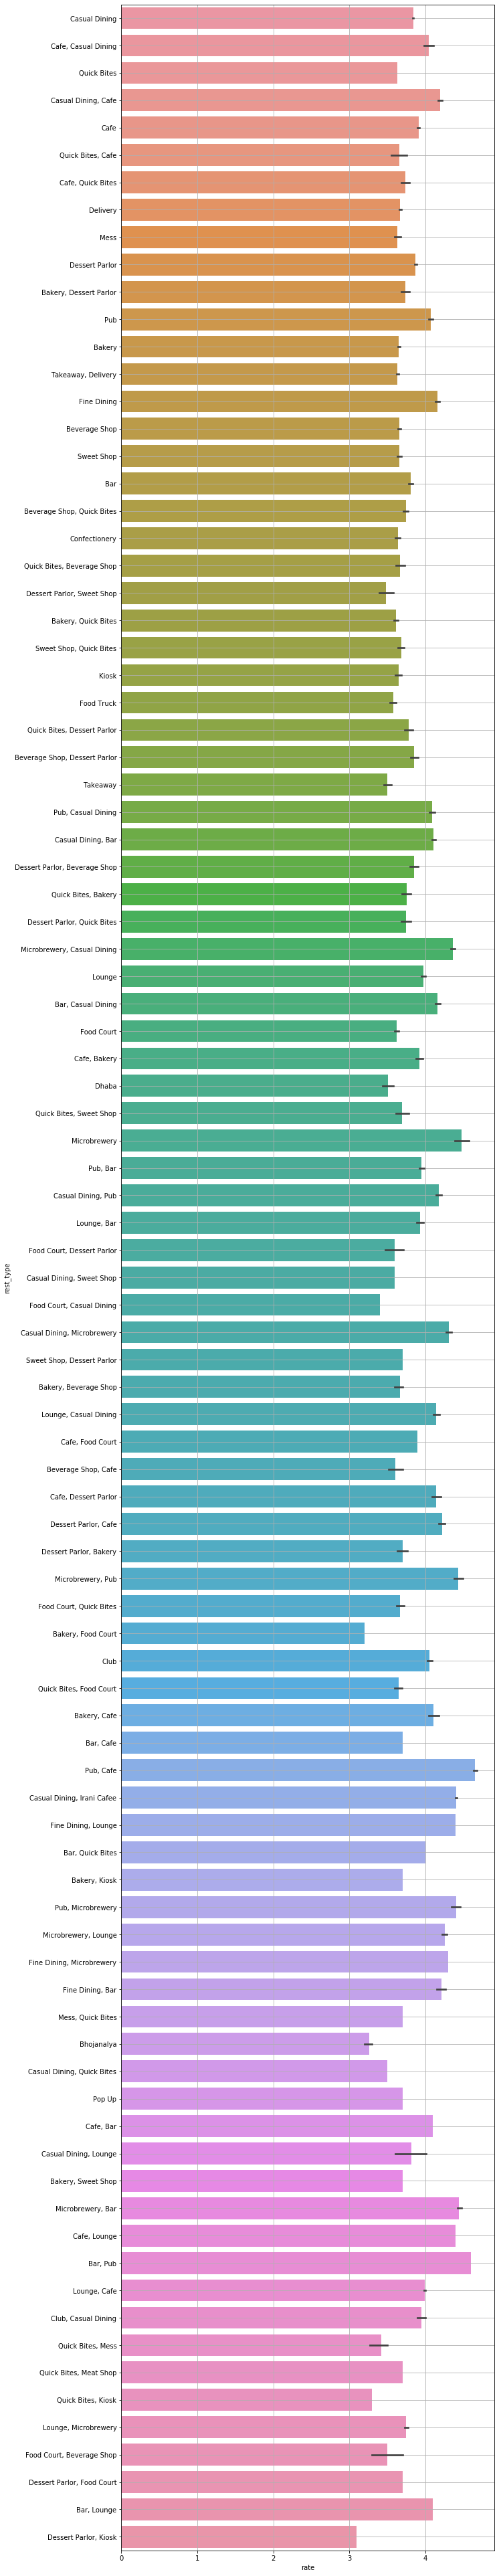

In [952]:
plt.figure(figsize=(10,70))
sns.barplot(y=dataz['rest_type'],x=dataz['rate'])
plt.yticks(rotation=0)
plt.grid()
plt.show()

Here,we can see the **Cafe,Lounge,Microbrewerry,Bar,Pub,Fine Dining** are highly rated rest_type.

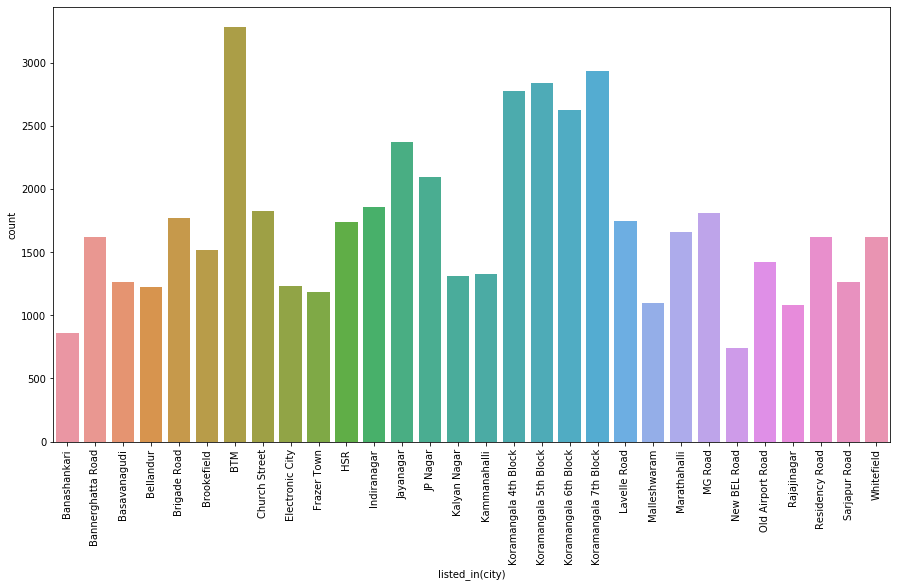

**Rating according to the Listed city**


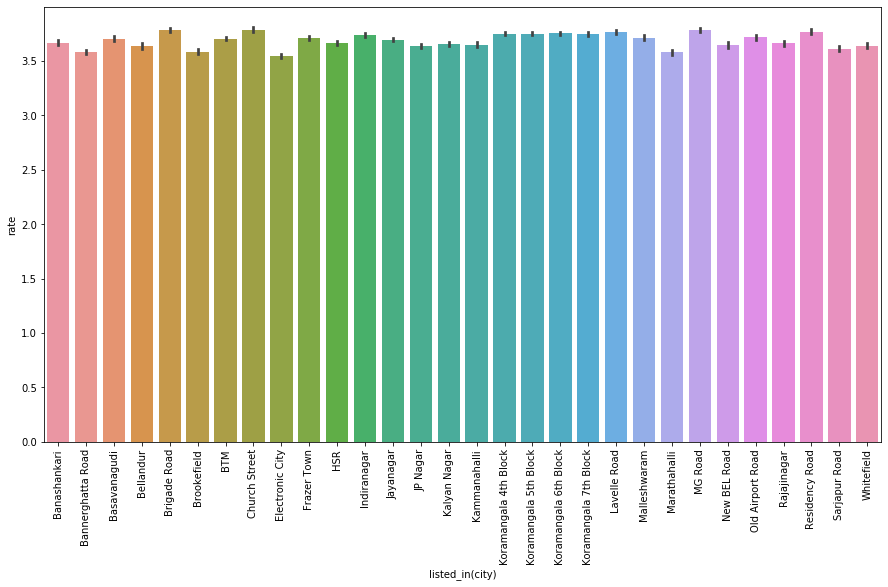

In [953]:
plt.figure(figsize=(15,8))
sns.countplot(data['listed_in(city)'])
plt.xticks(rotation=90)
plt.show()
print('**Rating according to the Listed city**')
plt.figure(figsize=(15,8))
sns.barplot(data['listed_in(city)'],data3['rate'])
plt.xticks(rotation=90)
plt.show()

In [954]:
rat_range = pd.cut(data3['rate'].sort_values(ascending=True),bins=15)

Here 0 is No and 1 is Yes


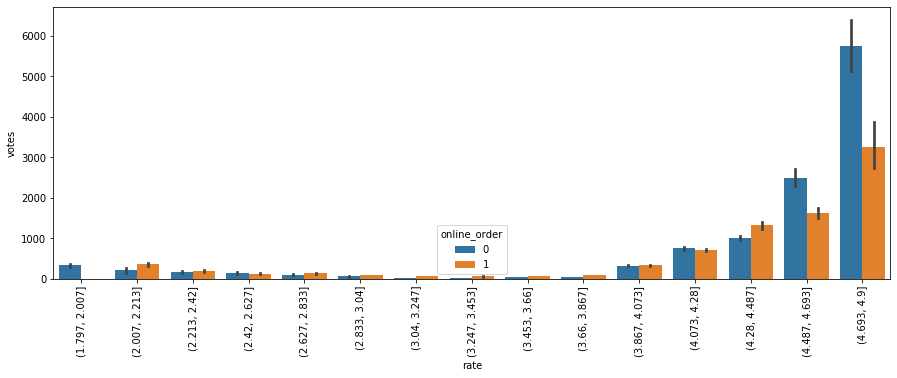

In [955]:
plt.figure(figsize=(15,5))
print('Here 0 is No and 1 is Yes')
sns.barplot(rat_range,data3['votes'],hue=data3['online_order'])
plt.xticks(rotation=90)
plt.show()

Highly Voter are avalible in the range 4.693 and 4.9 as well as in that highly majority of the people offine rather than offine.

Here 0 is No and 1 is Yes


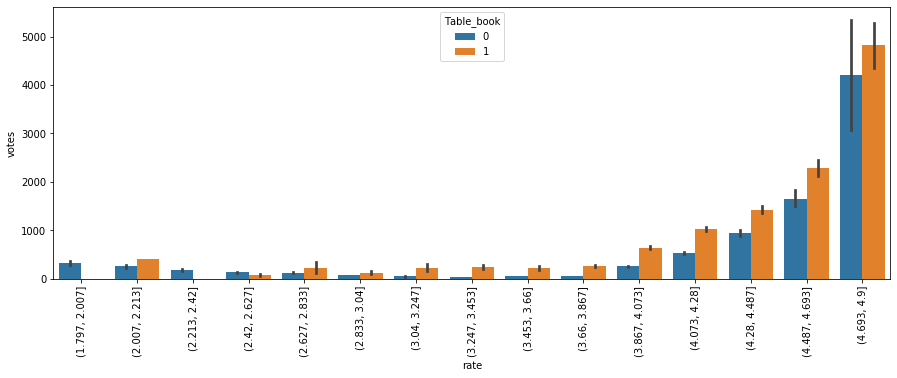

In [956]:
plt.figure(figsize=(15,5))
print('Here 0 is No and 1 is Yes')
sns.barplot(rat_range,data3['votes'],hue=data3['Table_book'])
plt.xticks(rotation=90)
plt.show()

Here, we can the high voter given high rating as well as In that Tabel Booked person given more rating the in that particular range i.e.(4.693 and 4.9) than the other.

In [957]:
data1['rating'] = data3['rate']

In [958]:
relevence=data1.groupby(['location','rating']).size()

In [959]:
relevence

location     rating
BTM          2.4        6
             2.5       10
             2.6       55
             2.7       29
             2.8       26
                       ..
Yeshwantpur  3.8        9
             3.9        6
             4.0        4
             4.1        2
             4.2        4
Length: 1370, dtype: int64

In [960]:
location = data1.groupby(['location']).size()

In [961]:
location

location
BTM                  5124
Banashankari          906
Banaswadi             664
Bannerghatta Road    1630
Basavanagudi          684
                     ... 
West Bangalore          6
Whitefield           2144
Wilson Garden         246
Yelahanka               6
Yeshwantpur           119
Length: 93, dtype: int64

In [962]:
proportions = relevence/location

In [963]:
proportions

location     rating
BTM          2.4       0.001171
             2.5       0.001952
             2.6       0.010734
             2.7       0.005660
             2.8       0.005074
                         ...   
Yeshwantpur  3.8       0.075630
             3.9       0.050420
             4.0       0.033613
             4.1       0.016807
             4.2       0.033613
Length: 1370, dtype: float64

### Most Famous Restraunts.

Text(0.5, 0, 'Number of outlets')

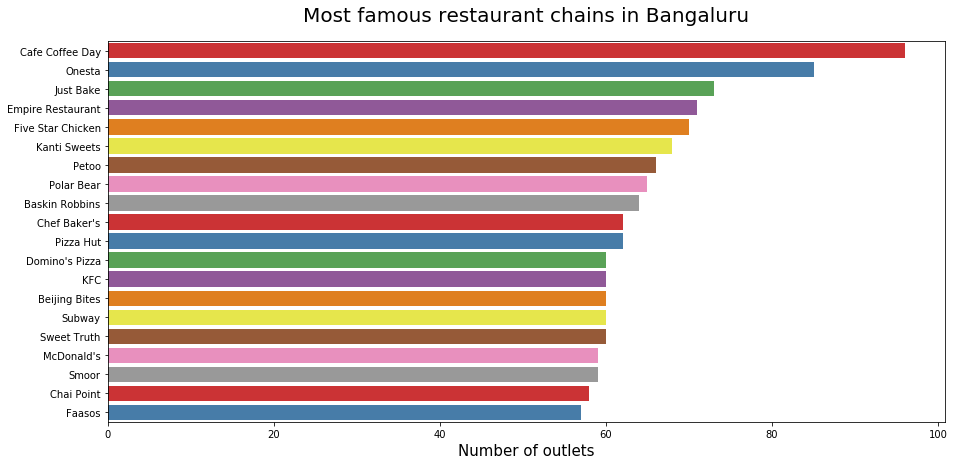

In [964]:
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 1.0, 'Cost of Restuarant')

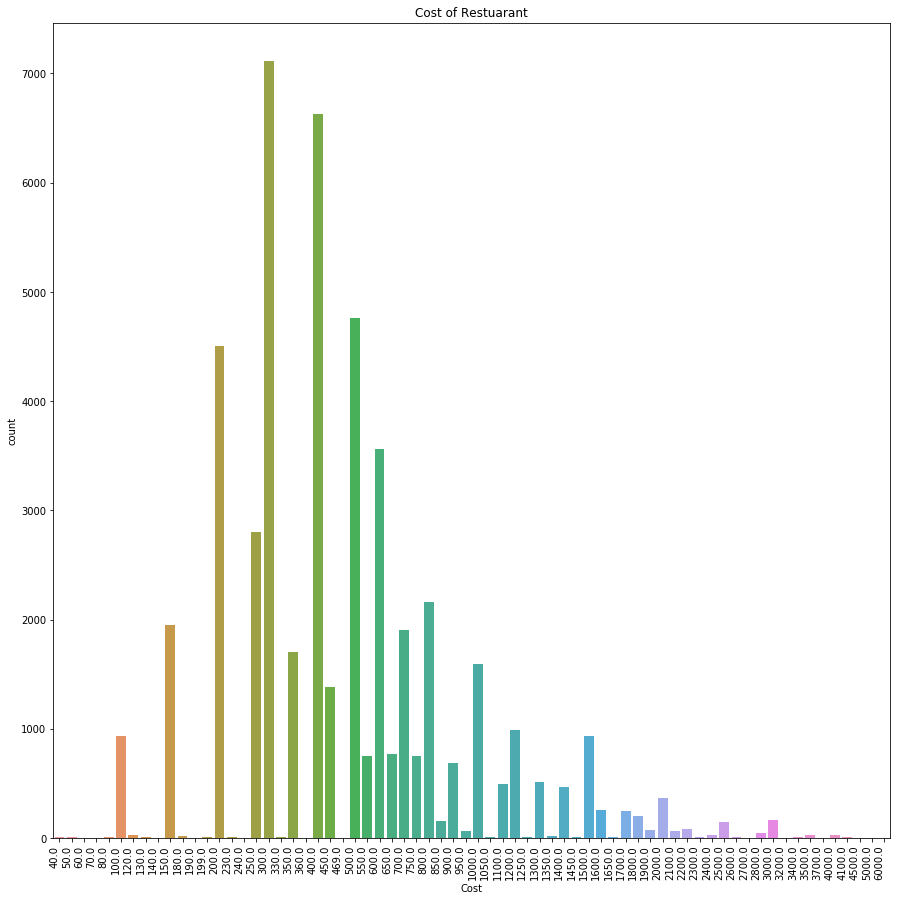

In [965]:
sns.countplot(data3['Cost'])
sns.countplot(data3['Cost']).set_xticklabels(sns.countplot(data3['Cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 1.0, 'NO. of restaurants in a Location')

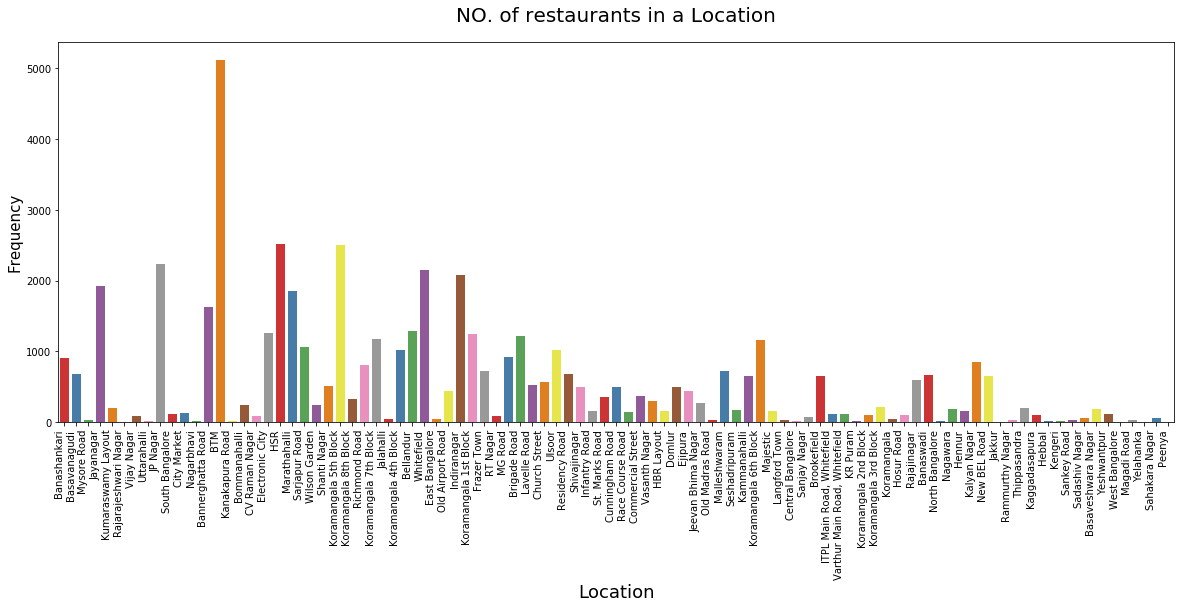

In [966]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restuarant Type')

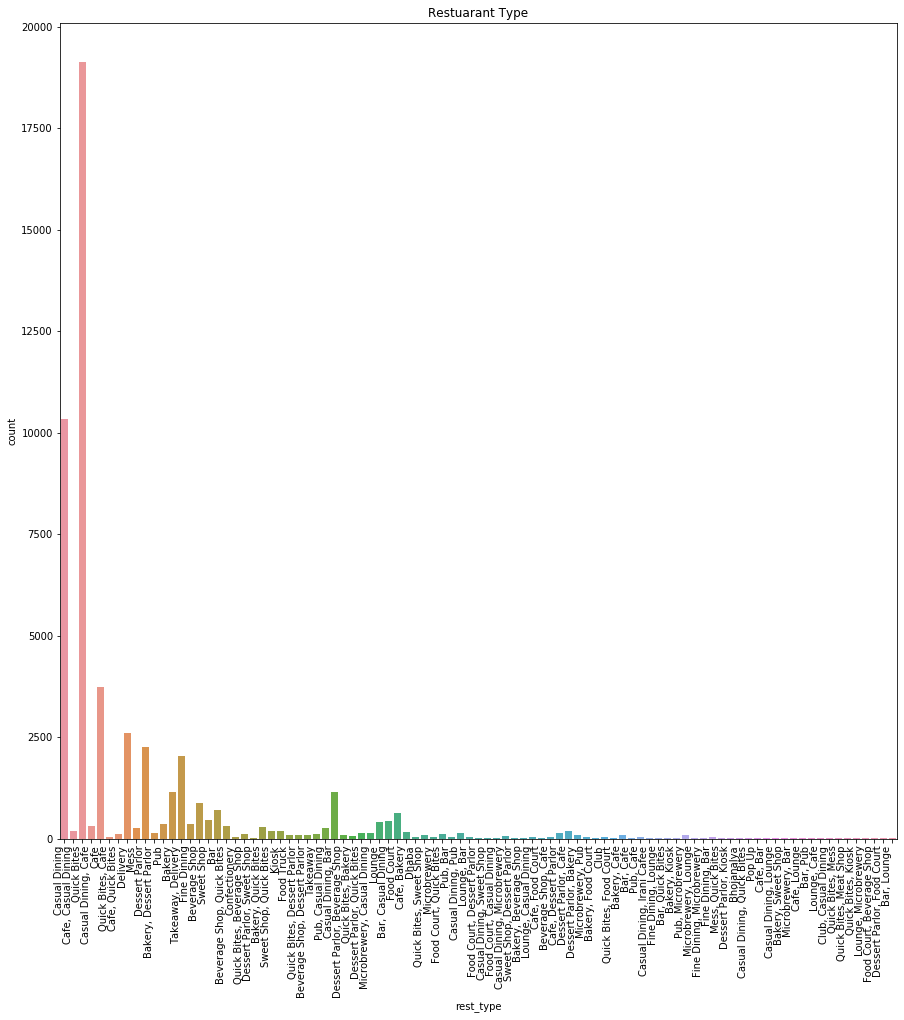

In [967]:
sns.countplot(data['rest_type'])
sns.countplot(data['rest_type']).set_xticklabels(sns.countplot(data['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

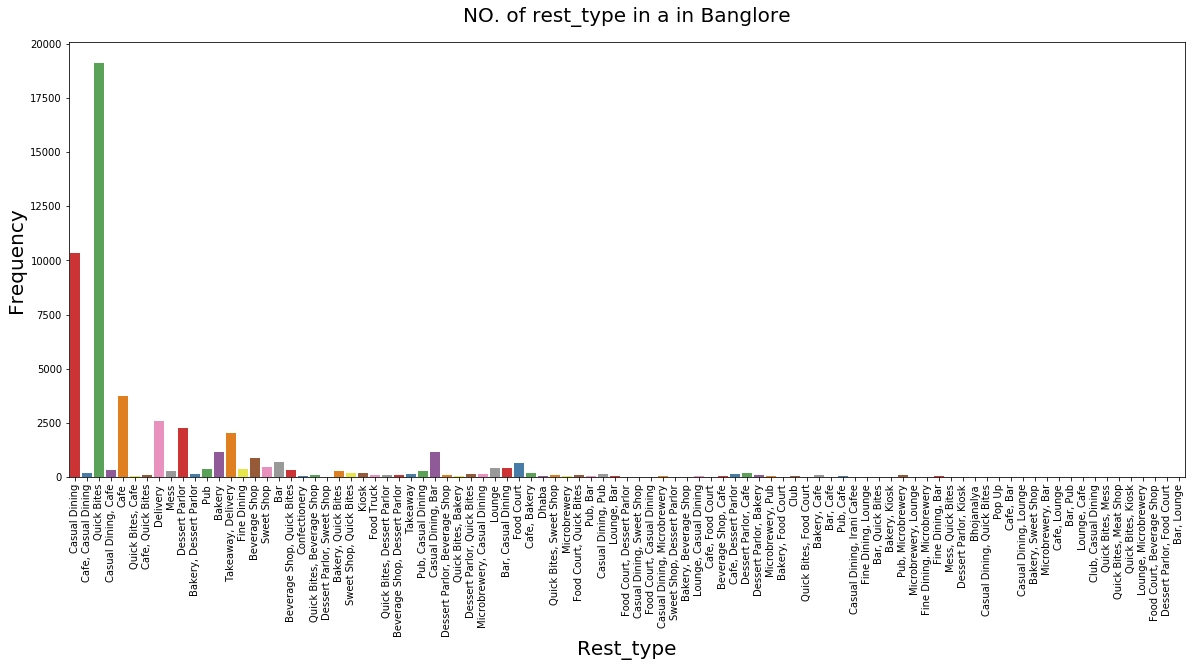

In [968]:
plt.figure(figsize=(20,8))
sns.countplot(data['rest_type'],palette='Set1')
plt.xticks(rotation=90)
plt.ylabel('Frequency',size=20)
plt.xlabel('Rest_type',size=20)
plt.title('NO. of rest_type in a in Banglore',size = 20,pad=20)
plt.show()

In [969]:
category = []
for i in data3['rate']:
    if i >3.5:
        category.append('Good')
    else:
        category.append('Bad')

In [970]:
category

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',

In [972]:
data3['Category']=category

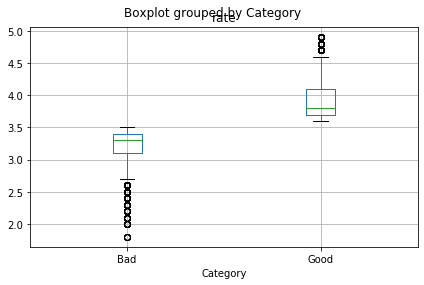

In [973]:
data3.boxplot(column='rate',by='Category')
plt.tight_layout()
plt.show()

## Model Building.

In [974]:
data3.head()

,online_order,Table_book,rate,votes,Cost,listed_in(type),listed_in(city),location,cuisines,Category
0,1,1,4.1,775,800.0,0,1,1,"North Indian, Mughlai, Chinese",Good
1,1,0,4.1,787,800.0,0,1,1,"Chinese, North Indian, Thai",Good
2,1,0,3.8,918,800.0,0,1,1,"Cafe, Mexican, Italian",Good
3,0,0,3.7,88,300.0,0,1,1,"South Indian, North Indian",Good
4,0,0,3.8,166,600.0,0,1,4,"North Indian, Rajasthani",Good


In [976]:
data3.drop(columns=['cuisines','Category'],inplace=True)

In [977]:
data3.head()

,online_order,Table_book,rate,votes,Cost,listed_in(type),listed_in(city),location
0,1,1,4.1,775,800.0,0,1,1
1,1,0,4.1,787,800.0,0,1,1
2,1,0,3.8,918,800.0,0,1,1
3,0,0,3.7,88,300.0,0,1,1
4,0,0,3.8,166,600.0,0,1,4


Since rating is looking like Countious data so we are using here,Regression Algorithhms.

In [982]:
x = data3.drop(columns=['rate'])
y = data3['rate']

In [983]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=0)

In [984]:
x_train.shape,x_test.shape

((39552, 7), (9888, 7))

In [985]:
feature = x_train.columns
feature

Index(['online_order', 'Table_book', 'votes', 'Cost', 'listed_in(type)',
       'listed_in(city)', 'location'],
      dtype='object')

In [999]:
scaler =StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test  = scaler.fit_transform(x_test)

Linear Regression:-

In [1000]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy :-,',r2_score(y_test,y_pred))

Accuracy :-, 0.2682590312380114


DecisionTreeRegression:-

In [1001]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

In [1002]:
Regressor = DecisionTreeRegressor(criterion='mse',random_state=42)
Regressor.fit(X_train,y_train)
y_prediction = Regressor.predict(X_test)
print('Accuracy :',r2_score(y_test,y_prediction) )

Accuracy : 0.044399120118518876


ExtraTreeRegressor.

In [1003]:
Regressor = ExtraTreeRegressor(criterion='mse',random_state=42)
Regressor.fit(X_train,y_train)
y_pre = Regressor.predict(X_test)
print('Accuracy :',r2_score(y_test,y_pre) )

Accuracy : -0.011730697101482557


RandomForestRegressor

In [1004]:
from sklearn.ensemble import RandomForestRegressor

In [1005]:
Regressor = ExtraTreeRegressor(criterion='mse',random_state=42,)
Regressor.fit(X_train,y_train)
y_pre = Regressor.predict(X_test)
print('Accuracy :',r2_score(y_test,y_pre) )

Accuracy : -0.011730697101482557


## Since we are not able to get good accuarcy so try to change by using Hyperparameter,Scalling,Feature engineering part.

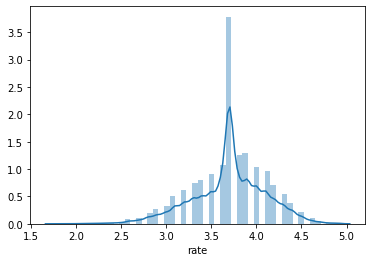

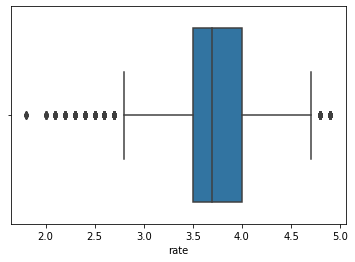

Kurtoisis of the data 0.550698928538889
Skew of the data -0.35742407609908794


In [1007]:
sns.distplot(data3['rate'])
plt.show()
sns.boxplot(data3['rate'])
plt.show()

print('Kurtoisis of the data',data3['rate'].kurt())
print('Skew of the data',data3['rate'].skew())

Since the Kurtoisis is far away from the zero as well as skewness of the is ngetive that's mesans here outliers presents.

**IQR Test**

In [1008]:
Q1 = data3['rate'].quantile(0.25)
Q3 = data3['rate'].quantile(0.75)

IQR = Q3-Q1
IQR

0.5

In [1014]:
data3.shape

(49440, 8)

In [1012]:
dataiqr = data3[~((data3['rate']<Q1-1.5*IQR)|(data3['rate']>Q3+1.5*IQR))]

In [1015]:
dataiqr.shape

(48464, 8)

In [1016]:
dataiqr.head()

,online_order,Table_book,rate,votes,Cost,listed_in(type),listed_in(city),location
0,1,1,4.1,775,800.0,0,1,1
1,1,0,4.1,787,800.0,0,1,1
2,1,0,3.8,918,800.0,0,1,1
3,0,0,3.7,88,300.0,0,1,1
4,0,0,3.8,166,600.0,0,1,4


In [1017]:
x = dataiqr.drop(columns='rate')
y = dataiqr['rate']

In [1018]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [1019]:
x_train.shape,x_test.shape

((38771, 7), (9693, 7))

In [1020]:
feature

Index(['online_order', 'Table_book', 'votes', 'Cost', 'listed_in(type)',
       'listed_in(city)', 'location'],
      dtype='object')

In [1054]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test  = scaler.transform(x_test)

In [1055]:
f_score,p_values = f_regression(X_train,y_train)

In [1056]:
p_values=pd.Series(p_values,index=feature)

In [1057]:
p_values.sort_values(ascending=False,inplace=True)

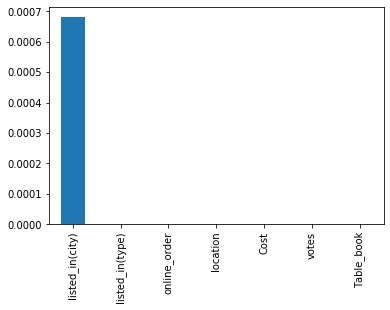

In [1058]:
p_values.plot(kind='bar')
plt.show()

In [1069]:
sel = SelectKBest(f_regression,k=6)

In [1070]:
sel.fit(X_train,y_train)

SelectKBest(k=6, score_func=<function f_regression at 0x000000000C85CCA8>)

In [1072]:
feature = x_train.columns[sel.get_support()]
feature

Index(['online_order', 'Table_book', 'votes', 'Cost', 'listed_in(type)',
       'location'],
      dtype='object')

In [1073]:
X_train = sel.transform(X_train)
X_test  = sel.transform(X_test)

In [1076]:
X_train.shape,X_test.shape

((38771, 6), (9693, 6))

In [1079]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('accuracy :-',r2_score(y_test,y_pred))

accuracy :- 0.2977414887322932


In [1080]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('accuracy :-',r2_score(y_test,y_pred))

accuracy :- 0.875300274589764


In [1081]:
model = DecisionTreeRegressor(random_state=42,criterion='mse',)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('accuracy :-',r2_score(y_test,y_pred))

accuracy :- 0.8141062935269952


We have got the 87% Accuarcy that is the highest accuarcy.

In [1137]:
X_train=pd.DataFrame(X_train,columns=feature)

In [1138]:
corrmat = X_train.corr()

In [1139]:
corrmat

,online_order,Table_book,votes,Cost,listed_in(type),location
online_order,1.000000,0.002481,0.034532,-0.083279,-0.229157,-0.058194
Table_book,0.002481,1.000000,0.406828,0.615897,0.103626,0.078830
votes,0.034532,0.406828,1.000000,0.382541,0.061406,0.039545
Cost,-0.083279,0.615897,0.382541,1.000000,0.162164,0.146993
listed_in(type),-0.229157,0.103626,0.061406,0.162164,1.000000,0.040552
location,-0.058194,0.078830,0.039545,0.146993,0.040552,1.000000


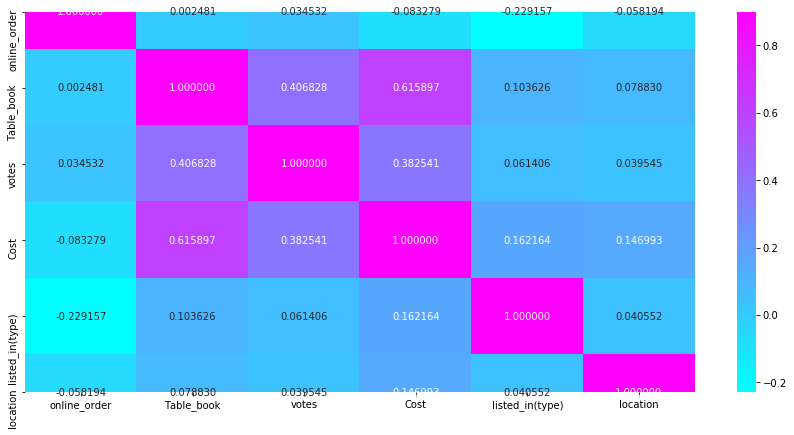

In [1146]:
plt.figure(figsize=(15,7))
sns.heatmap(corrmat,annot=True,vmax=0.9,fmt='f',cmap=plt.get_cmap('cool'))
plt.show()

Here we can the mutual correlation correlation inbetween the independed features.

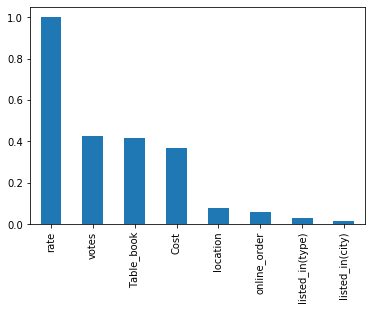

In [1155]:
corr = data3.corr()['rate']
corr
corr.sort_values(ascending=False).plot(kind='bar')
plt.show()

- This how the independed feature important is showing in the respect of Rate
- Votes and Table_book and Cost are very highly correlated rather gthan the others.

In [1156]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('accuracy :-',r2_score(y_test,y_pred))

accuracy :- 0.875300274589764


**First way.**

In [1157]:
import pickle

In [1159]:
# Saving model to disk
#filename is model.pkl
pickle.dump(model, open('model.pkl','wb'))

In [1163]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.875300274589764


**Second way to save the model.**

In [1164]:
import joblib

In [1166]:
save_model = joblib.dump(model,open('model.h5',mode='wb'))

In [1167]:
#again the load the model.

In [1172]:
load_model = joblib.load(open('model.h5',mode='rb'))

In [1173]:
result = load_model.score(X_test,y_test)

In [1174]:
print(result)

0.875300274589764


### Thank You..!!